# Домашнее задание № 2

**Постановка задачи**

Входные переменные:

* Расстояние до клиента (distance): от 0 до 20 км.

* Загруженность курьеров (courier_load): от 0 до 10.

* Процентиль суммы заказа (order_percentile): от 0 до 100.

Выходная переменная:

* Приоритет (priority): от 0 до 100.

In [3]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 33.6 MB/s eta 0:00:00


In [4]:
# Диапазоны значений
x_distance = np.arange(0, 21, 1)         # Расстояние до клиента
x_courier_load = np.arange(0, 11, 1)    # Загруженность курьеров
x_order_percentile = np.arange(0, 101, 1)  # Процентиль суммы заказа
x_priority = np.arange(0, 101, 1)       # Приоритет

# 1. Создаем нечеткие переменные
distance = Antecedent(x_distance, "distance")
courier_load = Antecedent(x_courier_load, "courier_load")
order_percentile = Antecedent(x_order_percentile, "order_percentile")
priority = Consequent(x_priority, "priority")


In [5]:
# 2. Определяем функции принадлежности

# Расстояние
distance["close"] = fuzz.trimf(x_distance, [0, 0, 10])        # Близко
distance["medium"] = fuzz.trimf(x_distance, [5, 10, 15])      # Среднее расстояние
distance["far"] = fuzz.trimf(x_distance, [10, 20, 20])        # Далеко

# Загруженность курьеров
courier_load["low"] = fuzz.trimf(x_courier_load, [0, 0, 5])   # Низкая
courier_load["medium"] = fuzz.trimf(x_courier_load, [2, 5, 8]) # Средняя
courier_load["high"] = fuzz.trimf(x_courier_load, [5, 10, 10]) # Высокая

# Процентиль суммы заказа
order_percentile["low"] = fuzz.trimf(x_order_percentile, [0, 0, 50])   # Низкий процентиль
order_percentile["medium"] = fuzz.trimf(x_order_percentile, [30, 50, 70]) # Средний процентиль
order_percentile["high"] = fuzz.trimf(x_order_percentile, [50, 100, 100]) # Высокий процентиль

# Приоритет
priority["low"] = fuzz.trimf(x_priority, [0, 0, 50])          # Низкий
priority["medium"] = fuzz.trimf(x_priority, [25, 50, 75])     # Средний
priority["high"] = fuzz.trimf(x_priority, [50, 100, 100])     # Высокий

In [6]:
# 3. Определяем правила
rule1 = Rule(distance["close"] & courier_load["low"] & order_percentile["high"], priority["high"])
rule2 = Rule(distance["medium"] & courier_load["medium"] & order_percentile["medium"], priority["medium"])
rule3 = Rule(distance["far"] & courier_load["high"] & order_percentile["low"], priority["low"])
rule4 = Rule(order_percentile["high"] & courier_load["low"], priority["high"])
rule5 = Rule(distance["close"] & courier_load["high"], priority["medium"])

In [7]:
# 4. Создаем систему управления
priority_ctrl = ControlSystem([rule1, rule2, rule3, rule4, rule5])
priority_sim = ControlSystemSimulation(priority_ctrl)


Рассчитанный приоритет: 79.58


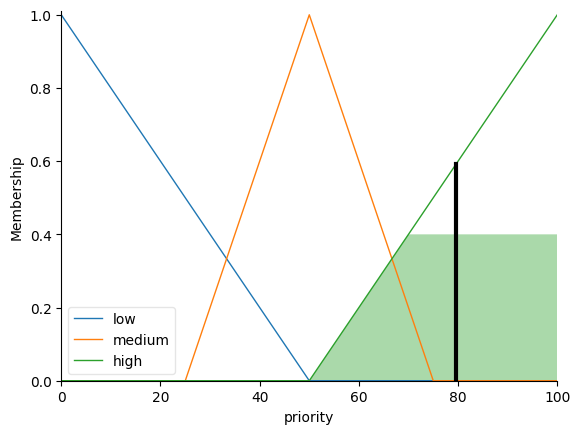

In [8]:
# 5. Выполняем симуляцию
# Ввод данных
priority_sim.input["distance"] = 7
priority_sim.input["courier_load"] = 3
priority_sim.input["order_percentile"] = 80

# Выполняем расчет
priority_sim.compute()

# Вывод результата
print(f"Рассчитанный приоритет: {priority_sim.output['priority']:.2f}")

# Визуализация
priority.view(sim=priority_sim)